In [1]:
import parallelPermutationTest as ppt
import numpy as np
from plots import timePlotSNS

### Get synthetic data

In [2]:
path = "figures/memoryAllocation"

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
N = list(range(10,150,10))
bins = [10,20,30]
n_samples  = 1_000
mean = 0
std = 1

variables = (N, bins, n_samples, mean, std)

data_generator = lambda mean, std, size ,n_samples : [np.random.normal(mean, std, size) for _ in range(n_samples)]

In [5]:
def memoryAllocation_N(variables, data_generator):
    N, bins, n_samples, mean, std = variables
    allMemNList = list()
    for b in bins:
        memList = list()
        for n in N:
            A = np.asarray(data_generator(mean, std, n, n_samples))
            B = np.asarray(data_generator(mean, std, n, n_samples))
        
            memList.append(ppt.GreenFloatCuda_memcheck(A,B, b, return_info_dict=True)["memory_MIB"])
        
        allMemNList.append(memList)
    
    return allMemNList

In [6]:
allMemNList = memoryAllocation_N(variables, data_generator)

The data requires 13.34Mib, and the GPU has 7624Mib available, so there are 7610.66Mib left after data allocation.
The data requires 46.94Mib, and the GPU has 7624Mib available, so there are 7577.06Mib left after data allocation.
The data requires 101.46Mib, and the GPU has 7624Mib available, so there are 7522.54Mib left after data allocation.
The data requires 171.72Mib, and the GPU has 7624Mib available, so there are 7452.28Mib left after data allocation.
The data requires 270.42Mib, and the GPU has 7624Mib available, so there are 7353.58Mib left after data allocation.
The data requires 377.43Mib, and the GPU has 7624Mib available, so there are 7246.57Mib left after data allocation.
The data requires 516.22Mib, and the GPU has 7624Mib available, so there are 7107.78Mib left after data allocation.
The data requires 654.43Mib, and the GPU has 7624Mib available, so there are 6969.57Mib left after data allocation.
The data requires 832.43Mib, and the GPU has 7624Mib available, so there a

In [7]:
namesList= [r"$n_{w}=10$", r"$n_{w}=20$", r"$n_{w}=30$"]

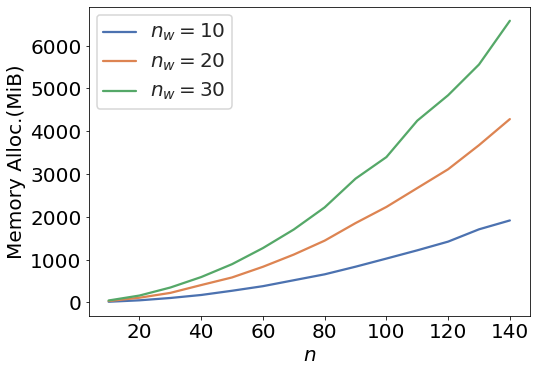

In [8]:
timePlotSNS(allMemNList,namesList,N, "Memory Alloc.(MiB)",r"$n$", path="./figures/experiemnt4/MemAlloc_N")

In [9]:
N = [100, 120, 140]
bins = list(range(10,30,2))
n_samples  = 1_000
mean = 0
std = 1

variables = (N, bins, n_samples, mean, std)

data_generator = lambda mean, std, size ,n_samples : [np.random.normal(mean, std, size) for _ in range(n_samples)]

In [12]:
def memoryAllocation_Bins(variables, data_generator):
    N, bins, n_samples, mean, std = variables
    allMemSList = list()
    for n in N:
        memList = list()
        for b in bins:
            A = np.asarray(data_generator(mean, std, n, n_samples))
            B = np.asarray(data_generator(mean, std, n, n_samples))
        
            memList.append(ppt.GreenFloatCuda_memcheck(A,B, b,return_info_dict=True)["memory_MIB"])
        
        allMemSList.append(memList)
    return allMemSList
        

In [13]:
allMemSList = memoryAllocation_Bins(variables, data_generator)

The data requires 999.42Mib, and the GPU has 7624Mib available, so there are 6624.58Mib left after data allocation.
The data requires 1269.12Mib, and the GPU has 7624Mib available, so there are 6354.88Mib left after data allocation.
The data requires 1477.17Mib, and the GPU has 7624Mib available, so there are 6146.83Mib left after data allocation.
The data requires 1731.46Mib, and the GPU has 7624Mib available, so there are 5892.54Mib left after data allocation.
The data requires 1993.45Mib, and the GPU has 7624Mib available, so there are 5630.55Mib left after data allocation.
The data requires 2226.17Mib, and the GPU has 7624Mib available, so there are 5397.83Mib left after data allocation.
The data requires 2515.9Mib, and the GPU has 7624Mib available, so there are 5108.1Mib left after data allocation.
The data requires 2707.0Mib, and the GPU has 7624Mib available, so there are 4917.0Mib left after data allocation.
The data requires 3053.76Mib, and the GPU has 7624Mib available, so t

In [14]:
nameList = [r"$n=100$", r"$n=120$", r"$n=140$"]

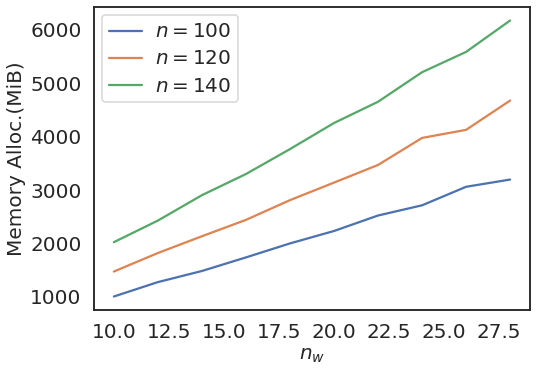

In [15]:
timePlotSNS(allMemSList,nameList,bins, "Memory Alloc.(MiB)",r"$n_{w}$", path="./figures/experiemnt4/MemAlloc_Bins")